In [1]:
# !pip install konlpy
# !pip install mecab-python
# !bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

In [2]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [3]:
# 설치 후, 런타임 재시작 해야함

In [4]:
!pip install KoNLPy

In [5]:
import json
import re
from konlpy.tag import Okt
from collections import Counter

import matplotlib
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
from wordcloud import WordCloud

In [6]:
path = '/content/drive/MyDrive/data/ML_BIG_data'
%cd /content/drive/MyDrive/data/ML_BIG_data

/content/drive/MyDrive/data/ML_BIG_data


In [7]:
# /content/drive/MyDrive/data/ML_BIG_data/etnews.kr_facebook_2016-01-01_2018-08-01_4차 산업혁명.json

input = '/content/drive/MyDrive/data/ML_BIG_data/etnews.kr_facebook_2016-01-01_2018-08-01_4차 산업혁명'


with open(input + '.json','r', encoding='utf-8') as file:
    data = json.load(file)

# print(data)
data

[{'created_time': '2018-06-20 18:06:39',
  'link': 'https://www.facebook.com/etnews.kr/videos/1981346601899735/',
  'message': '6월의 스파크포럼 - "미래 시대, 조직의 변화도 시작됐다!"\n\n스파크포럼은 현 사회의 사회문제 및 이슈를 제기하고, 그 이슈를 혁신적으로 해결하고자 하는 소셜이노베이터를 발굴, 지원하여 우리 사회 따뜻한 변화를 확산시키지 위해 만들어진 도전과 만남의 자리입니다.\n\n6월의 스파크포럼에서는 4차 산업혁명 시대의 기업조직과 조직문화를 살펴보고, 조직의 변화를 받아들이고 실험해나가는 사례를 통해 미래 시대 조직이 나아가야 할 방향을 함께 생각해보고자 합니다.',
  'name': '6월의 스파크포럼 - "미래 시대, 조직의 변화도 시작됐다!"',
  'post_id': '407886705912407_1981346601899735',
  'total_comments': 3},
 {'created_time': '2018-06-14 10:41:16',
  'link': 'http://www.etnews.com/20180612000347',
  'message': '로봇이 4차 산업혁명 주요 성장 동력으로 떠오르면서 국내 로봇 기업에 재평가가 이뤄지고 있다는 분석입니다.',
  'name': '기술력 갖춘 로봇기업 몸값 치솟는다',
  'post_id': '407886705912407_1971252229575839',
  'total_comments': 0},
 {'created_time': '2018-04-10 17:42:00',
  'link': 'http://www.etnews.com/20180409000360?mc=em_002_00001',
  'message': '4차 산업혁명 시대 금융 산업 전반 점검해야 한다는...',
  'name': "휘청거리는 대한민국 '금융'...서민도 기업도 ICT도 실종",
  'post_id': '

In [8]:
data[0]['message']

'6월의 스파크포럼 - "미래 시대, 조직의 변화도 시작됐다!"\n\n스파크포럼은 현 사회의 사회문제 및 이슈를 제기하고, 그 이슈를 혁신적으로 해결하고자 하는 소셜이노베이터를 발굴, 지원하여 우리 사회 따뜻한 변화를 확산시키지 위해 만들어진 도전과 만남의 자리입니다.\n\n6월의 스파크포럼에서는 4차 산업혁명 시대의 기업조직과 조직문화를 살펴보고, 조직의 변화를 받아들이고 실험해나가는 사례를 통해 미래 시대 조직이 나아가야 할 방향을 함께 생각해보고자 합니다.'

In [9]:
data[1]['message']

'로봇이 4차 산업혁명 주요 성장 동력으로 떠오르면서 국내 로봇 기업에 재평가가 이뤄지고 있다는 분석입니다.'

In [10]:
message =""

seen_messages = set() # 중복 메시지 추적하기 위한 집합

for item in data:
#   print(item)
    if 'message' in item.keys():
        new_message = re.sub(r'[^\w]',' ', item['message'])
        if new_message not in seen_messages:
            seen_messages.add(new_message)
            message += new_message
            # print(new_message)
            # print(message)


print(message)

6월의 스파크포럼    미래 시대  조직의 변화도 시작됐다    스파크포럼은 현 사회의 사회문제 및 이슈를 제기하고  그 이슈를 혁신적으로 해결하고자 하는 소셜이노베이터를 발굴  지원하여 우리 사회 따뜻한 변화를 확산시키지 위해 만들어진 도전과 만남의 자리입니다   6월의 스파크포럼에서는 4차 산업혁명 시대의 기업조직과 조직문화를 살펴보고  조직의 변화를 받아들이고 실험해나가는 사례를 통해 미래 시대 조직이 나아가야 할 방향을 함께 생각해보고자 합니다 로봇이 4차 산업혁명 주요 성장 동력으로 떠오르면서 국내 로봇 기업에 재평가가 이뤄지고 있다는 분석입니다 4차 산업혁명 시대 금융 산업 전반 점검해야 한다는   공통 간판 공약은  4차 산업혁명 선도 도시 구현 과  가상화폐 블록체인 기술 활용  등입니다  https   goo gl qPEyAJ이번 과정은 4차 산업혁명 핵심 기술인 AI에 대한 통찰력과 알파고를 통해 우리 일상과 익숙해진 로봇  빅데이터 산업 흐름을 알려줍니다   인공지능  최고위과정  산학연최고전문가 https   goo gl jSZSNX4차 산업혁명 모든 기술과 서비스 구현산업혁명의 나라  영국엔 4차 산업혁명이 없다  한국 영국 경험과 지혜를 모으는  미래비즈니스포럼 2017  개최 전자신문TV 라이브  SBA 신직업위크  4차 산업혁명 시대의 경쟁력 확보와 일자리 창출의 해법을 신직업에서 찾고 있는 서울산업진흥원 SBA 이 자신들의 역량과 노력을 모두 담은  제 2회 신직업위크 를 진행하고 있습니다   이번 전자신문TV라이브는 서울 대치동 SBA 신직업교육센터에서 강만구 신직업교육팀장과 서지윤 신직업리서치팀수석  윤석원 테스트웍스 대표 등과 함께  제 2회 신직업위크 와 최신 신직업트렌드를 알아보는 시간으로 마련했습니다  많은 시청 바랍니다     전자신문  전자신문엔터  전자신문TV  라이브  소셜방송  현장라이브  손보련  신직업위크  서울산업진흥원  SBA  신직업  서울  강만구  서지윤  윤석원  테스트웍스  소프트웨어  테스터 

In [11]:
message

'6월의 스파크포럼    미래 시대  조직의 변화도 시작됐다    스파크포럼은 현 사회의 사회문제 및 이슈를 제기하고  그 이슈를 혁신적으로 해결하고자 하는 소셜이노베이터를 발굴  지원하여 우리 사회 따뜻한 변화를 확산시키지 위해 만들어진 도전과 만남의 자리입니다   6월의 스파크포럼에서는 4차 산업혁명 시대의 기업조직과 조직문화를 살펴보고  조직의 변화를 받아들이고 실험해나가는 사례를 통해 미래 시대 조직이 나아가야 할 방향을 함께 생각해보고자 합니다 로봇이 4차 산업혁명 주요 성장 동력으로 떠오르면서 국내 로봇 기업에 재평가가 이뤄지고 있다는 분석입니다 4차 산업혁명 시대 금융 산업 전반 점검해야 한다는   공통 간판 공약은  4차 산업혁명 선도 도시 구현 과  가상화폐 블록체인 기술 활용  등입니다  https   goo gl qPEyAJ이번 과정은 4차 산업혁명 핵심 기술인 AI에 대한 통찰력과 알파고를 통해 우리 일상과 익숙해진 로봇  빅데이터 산업 흐름을 알려줍니다   인공지능  최고위과정  산학연최고전문가 https   goo gl jSZSNX4차 산업혁명 모든 기술과 서비스 구현산업혁명의 나라  영국엔 4차 산업혁명이 없다  한국 영국 경험과 지혜를 모으는  미래비즈니스포럼 2017  개최 전자신문TV 라이브  SBA 신직업위크  4차 산업혁명 시대의 경쟁력 확보와 일자리 창출의 해법을 신직업에서 찾고 있는 서울산업진흥원 SBA 이 자신들의 역량과 노력을 모두 담은  제 2회 신직업위크 를 진행하고 있습니다   이번 전자신문TV라이브는 서울 대치동 SBA 신직업교육센터에서 강만구 신직업교육팀장과 서지윤 신직업리서치팀수석  윤석원 테스트웍스 대표 등과 함께  제 2회 신직업위크 와 최신 신직업트렌드를 알아보는 시간으로 마련했습니다  많은 시청 바랍니다     전자신문  전자신문엔터  전자신문TV  라이브  소셜방송  현장라이브  손보련  신직업위크  서울산업진흥원  SBA  신직업  서울  강만구  서지윤  윤석원  테스트웍스  소프트웨어  테스터

In [12]:
# 형태소 분류기 Okt() 활용, 명사 추출
nlp = Okt()
print(nlp.nouns(message)) # noun : 명사

['스파크', '포럼', '미래', '시대', '조직', '변화', '시작', '스파크', '포럼', '현', '사회', '사회', '문제', '및', '이슈', '제기', '그', '이슈', '혁신', '해결', '소셜', '이노', '베이', '터', '발굴', '지원', '우리', '사회', '변화', '확산', '위해', '도전', '만남', '자리', '스파크', '포럼', '차', '산업혁명', '시대', '기업', '조직', '직문', '조직', '변화', '실험', '사례', '통해', '미래', '시대', '조직', '방향', '생각', '로봇', '차', '산업혁명', '주요', '성장', '동력', '국내', '로봇', '기업', '재', '평가', '분석', '차', '산업혁명', '시대', '금융', '산업', '전반', '점검', '공통', '간판', '공약', '차', '산업혁명', '선도', '도시', '구현', '과', '가상', '화폐', '블록', '체인', '기술', '활용', '등', '이번', '과정', '차', '산업혁명', '핵심', '기술', '대한', '통찰', '알파', '통해', '우리', '일상', '로봇', '빅데이터', '산업', '흐름', '인공', '지능', '최고', '위', '과정', '산학', '최고', '전문가', '차', '산업혁명', '모든', '기술', '서비스', '산업혁명', '나라', '영국', '차', '산업혁명', '한국', '영국', '경험', '지혜', '미래', '비즈니스', '포럼', '개최', '전자신문', '라이브', '직업', '위', '차', '산업혁명', '시대', '경쟁력', '확보', '일자리', '창', '해법', '직업', '산업', '진흥', '이', '자신', '역량', '노력', '모두', '제', '직업', '위', '를', '진행', '이번', '전자신문', '라이브', '서울', '대치동', '직업', '교육', '센터', '강', '만구', '직

In [13]:
message_n =nlp.nouns(message)

In [14]:
count_n = Counter(message_n)
count_n
print(count_n)

Counter({'차': 23, '산업혁명': 22, '전자신문': 13, '산업': 10, '직업': 10, '기술': 8, '시대': 7, '라이브': 7, '이번': 6, '진흥': 6, '포럼': 5, '위': 5, '일자리': 5, '창': 5, '조직': 4, '터': 4, '통해': 4, '진행': 4, '스파크': 3, '미래': 3, '변화': 3, '사회': 3, '기업': 3, '로봇': 3, '등': 3, '노력': 3, '서울': 3, '시간': 3, '방송': 3, '대응': 3, '주형': 3, '철': 3, '전자': 3, '정보': 3, '이슈': 2, '소셜': 2, '우리': 2, '위해': 2, '사례': 2, '주요': 2, '국내': 2, '활용': 2, '과정': 2, '빅데이터': 2, '흐름': 2, '최고': 2, '서비스': 2, '영국': 2, '한국': 2, '경쟁력': 2, '제': 2, '를': 2, '교육': 2, '강': 2, '만구': 2, '팀': 2, '지윤': 2, '윤석': 2, '테스트': 2, '웍스': 2, '대표': 2, '시청': 2, '현장': 2, '소프트웨어': 2, '테스': 2, '가장': 2, '과제': 2, '대표이사': 2, '공공기관': 2, '중소기업': 2, '모시': 2, '국정': 2, '컨퍼런스': 2, '행사': 2, '페이스북': 2, '대비': 2, '시작': 1, '현': 1, '문제': 1, '및': 1, '제기': 1, '그': 1, '혁신': 1, '해결': 1, '이노': 1, '베이': 1, '발굴': 1, '지원': 1, '확산': 1, '도전': 1, '만남': 1, '자리': 1, '직문': 1, '실험': 1, '방향': 1, '생각': 1, '성장': 1, '동력': 1, '재': 1, '평가': 1, '분석': 1, '금융': 1, '전반': 1, '점검': 1, '공통': 1, '간판': 1, '공약': 1, '선도': 1, '도시

In [15]:
word_count = dict()

for tag, counts in count_n.most_common(80):
    if (len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d"%(tag, counts))

산업혁명 : 22
전자신문 : 13
산업 : 10
직업 : 10
기술 : 8
시대 : 7
라이브 : 7
이번 : 6
진흥 : 6
포럼 : 5
일자리 : 5
조직 : 4
통해 : 4
진행 : 4
스파크 : 3
미래 : 3
변화 : 3
사회 : 3
기업 : 3
로봇 : 3
노력 : 3
서울 : 3
시간 : 3
방송 : 3
대응 : 3
주형 : 3
전자 : 3
정보 : 3
이슈 : 2
소셜 : 2
우리 : 2
위해 : 2
사례 : 2
주요 : 2
국내 : 2
활용 : 2
과정 : 2
빅데이터 : 2
흐름 : 2
최고 : 2
서비스 : 2
영국 : 2
한국 : 2
경쟁력 : 2
교육 : 2
만구 : 2
지윤 : 2
윤석 : 2
테스트 : 2
웍스 : 2
대표 : 2
시청 : 2
현장 : 2
소프트웨어 : 2
테스 : 2
가장 : 2
과제 : 2
대표이사 : 2
공공기관 : 2
중소기업 : 2
모시 : 2
국정 : 2
컨퍼런스 : 2
행사 : 2
페이스북 : 2
대비 : 2
시작 : 1
문제 : 1


In [16]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

# font_path = 'font 가 있는 경로 설정 (C:\ ~ .ttf)'
font ='NanumBarunGothic'

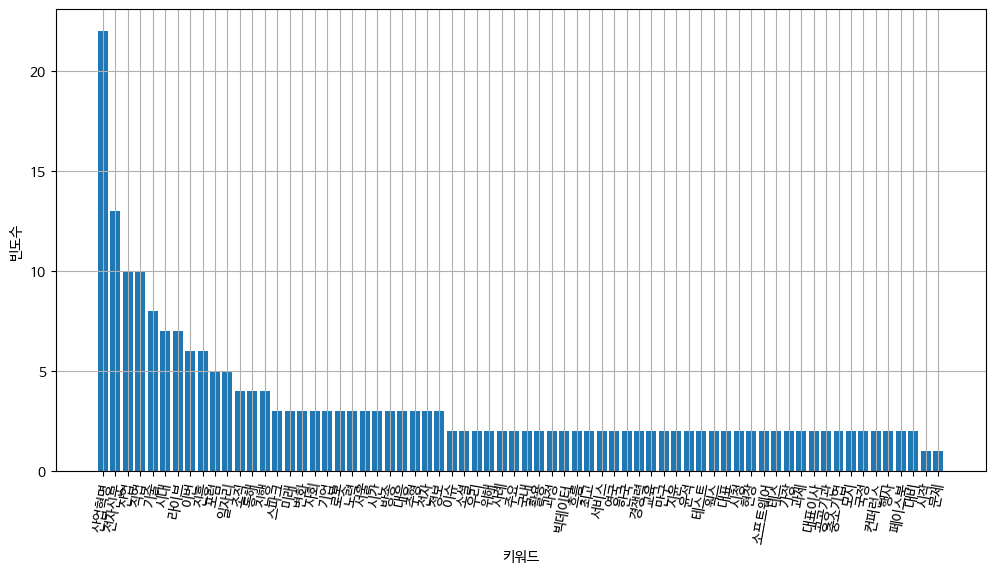

In [17]:
plt.figure(figsize=(12,6))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid()

sorted_keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_values, align='center')
plt.xticks(range(len(word_count)), list(sorted_keys), rotation=80)
plt.show()


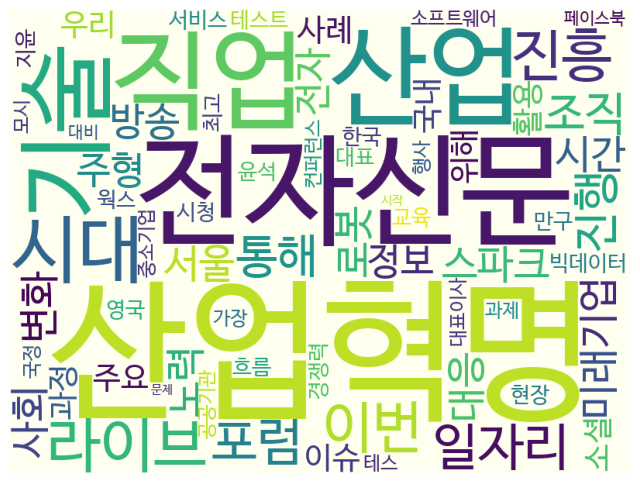

In [18]:
# local pc (경로 설정)
# wc = WordCloud(font_path,background_color='ivory', width=800, height=600)
wc = WordCloud(font,background_color='ivory', width=800, height=600)
cloud = wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [22]:
# mecab()
from konlpy.tag import Mecab
# 형태소 분류기 Okt() 활용, 명사 추출
# mecab = Mecab()
nlp = Mecab()
message_n =nlp.nouns(message)

word_count = dict()

for tag, counts in count_n.most_common(80):
    if (len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d"%(tag, counts))


산업혁명 : 22
전자신문 : 13
산업 : 10
직업 : 10
기술 : 8
시대 : 7
라이브 : 7
이번 : 6
진흥 : 6
포럼 : 5
일자리 : 5
조직 : 4
통해 : 4
진행 : 4
스파크 : 3
미래 : 3
변화 : 3
사회 : 3
기업 : 3
로봇 : 3
노력 : 3
서울 : 3
시간 : 3
방송 : 3
대응 : 3
주형 : 3
전자 : 3
정보 : 3
이슈 : 2
소셜 : 2
우리 : 2
위해 : 2
사례 : 2
주요 : 2
국내 : 2
활용 : 2
과정 : 2
빅데이터 : 2
흐름 : 2
최고 : 2
서비스 : 2
영국 : 2
한국 : 2
경쟁력 : 2
교육 : 2
만구 : 2
지윤 : 2
윤석 : 2
테스트 : 2
웍스 : 2
대표 : 2
시청 : 2
현장 : 2
소프트웨어 : 2
테스 : 2
가장 : 2
과제 : 2
대표이사 : 2
공공기관 : 2
중소기업 : 2
모시 : 2
국정 : 2
컨퍼런스 : 2
행사 : 2
페이스북 : 2
대비 : 2
시작 : 1
문제 : 1


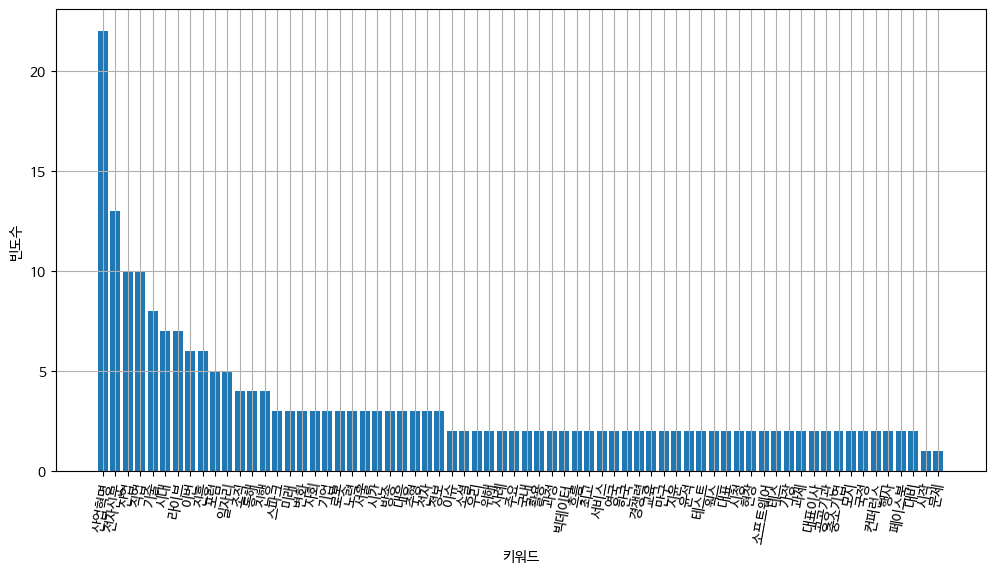

In [23]:
plt.figure(figsize=(12,6))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid()

sorted_keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_values, align='center')
plt.xticks(range(len(word_count)), list(sorted_keys), rotation=80)
plt.show()


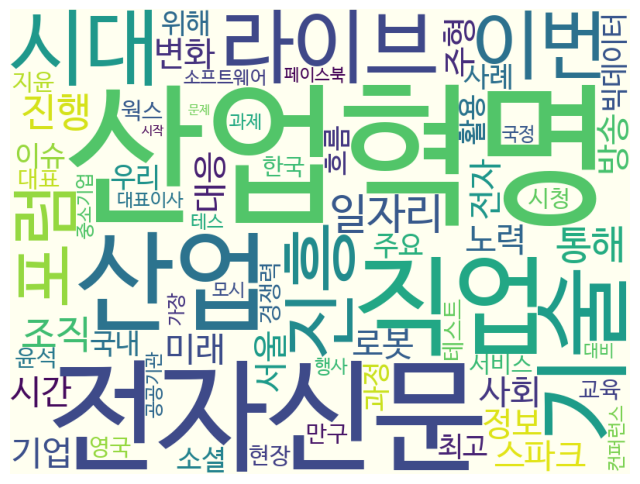

In [24]:
wc = WordCloud(font,background_color='ivory', width=800, height=600)
cloud = wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

open() 함수와 with open()

In [ ]:
import json


input = '/content/drive/MyDrive/data/ML_BIG_data/etnews.kr_facebook_2016-01-01_2018-08-01_4차 산업혁명'

file = open(input+'.json', 'r', encoding='utf-8')
# 'r' : read

data = json.load(file)

file.close() # 반드시 닫아 주어야 함

print(data)

In [ ]:
input = '/content/drive/MyDrive/data/ML_BIG_data/etnews.kr_facebook_2016-01-01_2018-08-01_4차 산업혁명'


with open(input + '.json','r', encoding='utf-8') as file:
    data = json.load(file)

print(data)